In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()



# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
results_all = engine.execute('SELECT max(date) from Measurement').fetchall()
for result in results_all:
    print(result)

('2017-08-23',)


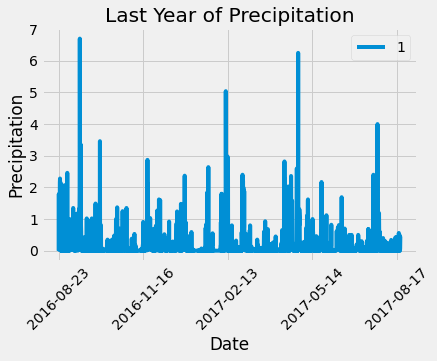

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.



# Perform a query to retrieve the data and precipitation scores
last_year_precip = engine.execute('SELECT date, prcp FROM Measurement WHERE date >= "2016-08-23"').fetchall()



# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(last_year_precip).set_index(0)
prcp_df = prcp_df.rename(columns={'0':'date','1':'precipitation'})


# Sort the dataframe by date
prcp_df=prcp_df.sort_values(by=[0]).dropna()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=45)
plt.title("Last Year of Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()



In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,1
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
Station_ID = engine.execute('SELECT distinct station FROM Station')
for ID in Station_ID:
    print(ID)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [33]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
comined_data = engine.execute('SELECT distinct S.station, count(distinct M.date) FROM Measurement M, Station S WHERE M.station=S.station  GROUP BY S.station ORDER BY count(distinct M.date) DESC' )
for result in comined_data:
    print(result)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = engine.execute('SELECT distinct station, min(tobs), max(tobs), avg(tobs) FROM Measurement WHERE station = "USC00519281"').fetchall()
for x in most_active:
    print(x)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
busiest_last_year = engine.execute('SELECT tobs FROM Measurement WHERE date >= "2016-08-23" AND station = "USC00519281"').fetchall()
for result in busiest_last_year:
    print(result)

(77.0,)
(77.0,)
(80.0,)
(80.0,)
(75.0,)
(73.0,)
(78.0,)
(77.0,)
(78.0,)
(80.0,)
(80.0,)
(78.0,)
(78.0,)
(78.0,)
(73.0,)
(74.0,)
(80.0,)
(79.0,)
(77.0,)
(80.0,)
(76.0,)
(79.0,)
(75.0,)
(79.0,)
(78.0,)
(79.0,)
(78.0,)
(78.0,)
(76.0,)
(74.0,)
(77.0,)
(78.0,)
(79.0,)
(79.0,)
(77.0,)
(80.0,)
(78.0,)
(78.0,)
(78.0,)
(77.0,)
(79.0,)
(79.0,)
(79.0,)
(79.0,)
(75.0,)
(76.0,)
(73.0,)
(72.0,)
(71.0,)
(77.0,)
(79.0,)
(78.0,)
(79.0,)
(77.0,)
(79.0,)
(77.0,)
(78.0,)
(78.0,)
(78.0,)
(78.0,)
(77.0,)
(74.0,)
(75.0,)
(76.0,)
(73.0,)
(76.0,)
(74.0,)
(77.0,)
(76.0,)
(76.0,)
(74.0,)
(75.0,)
(75.0,)
(75.0,)
(75.0,)
(71.0,)
(63.0,)
(70.0,)
(68.0,)
(67.0,)
(77.0,)
(74.0,)
(77.0,)
(76.0,)
(76.0,)
(75.0,)
(76.0,)
(75.0,)
(73.0,)
(75.0,)
(73.0,)
(75.0,)
(74.0,)
(75.0,)
(74.0,)
(75.0,)
(73.0,)
(75.0,)
(73.0,)
(73.0,)
(74.0,)
(70.0,)
(72.0,)
(70.0,)
(67.0,)
(67.0,)
(69.0,)
(70.0,)
(68.0,)
(69.0,)
(69.0,)
(66.0,)
(65.0,)
(68.0,)
(62.0,)
(75.0,)
(70.0,)
(69.0,)
(76.0,)
(76.0,)
(74.0,)
(73.0,)
(71.0,)
(74.0,)
(74.0,)


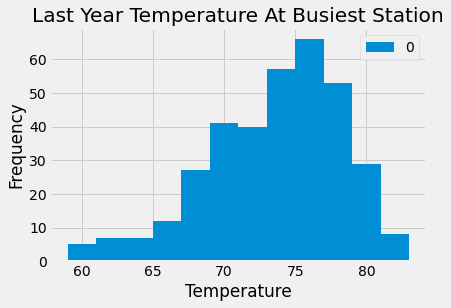

In [54]:
#plot the results as a histogram
busy_df = pd.DataFrame(busiest_last_year)

busy_df.plot.hist(bins=12)
plt.title("Last Year Temperature At Busiest Station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [55]:
# Close Session
session.close()